In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

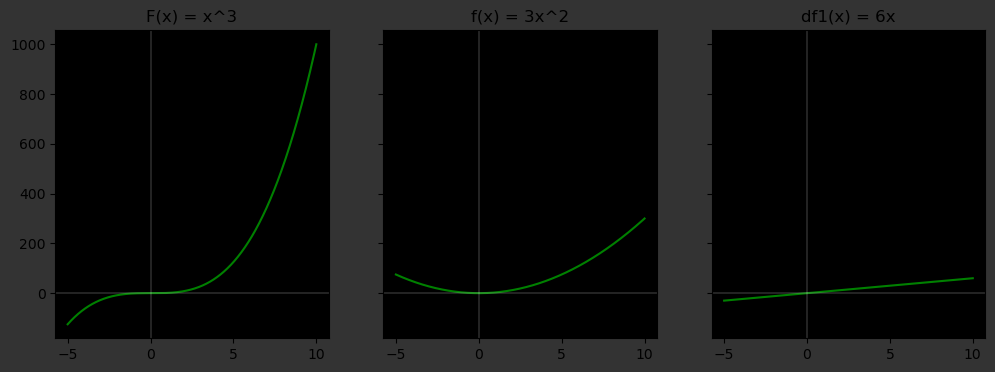

In [29]:
def F(x):
    return x**3

def f(x):
    return 3*x**2


def df1(x):
    return 6*x


def df2(x):
    return 6 + x*0


x = np.linspace(-5, 10, 1000)


fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4),sharey = True)

axs[0].plot(x, F(x), c = 'green')
axs[1].plot(x, f(x), c = 'green')
axs[2].plot(x, df1(x),c='green')


axs[0].set_title("F(x) = x^3")
axs[1].set_title("f(x) = 3x^2")
axs[2].set_title("df1(x) = 6x")

for n in range(3):
    axs[n].set_facecolor('black')
    axs[n].axhline(y=0, c='white', lw=0.2)
    axs[n].axvline(x=0, c='white', lw=0.2)

    
plt.show()

In [30]:
def polypow3(co):
    '''input has to be tuple or list containing all coeffs L[0] = x³ to L[3] = x^0'''
    
    F = lambda x: co[0]*x**3 + co[1]*x**2 + co[2]*x + co[3]
    f = lambda x: 3*co[0]*x**2 + 2*co[1]*x + co[2]
    df1 = lambda x: 6*co[0]*x +2*co[1]

    x = np.linspace(-5, 10, 100)

    fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4),sharey = True)
    
    axs[0].plot(x, F(x), c = 'black')
    axs[1].plot(x, f(x), c = 'black')
    axs[2].plot(x, df1(x),c ='black')
    axs[0].set_title("F(x) = {}x³+{}x²+{}x+{}".format(co[0],co[1],co[2],co[3]))
    axs[1].set_title("f(x) = {}x²+{}x+{}".format(3*co[0],2*co[1],co[2]))
    axs[2].set_title("df1(x) = {}x+{}".format(6*co[0],2*co[1]))

    for n in range(3):
        axs[n].set_facecolor('0.13')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
    plt.show()

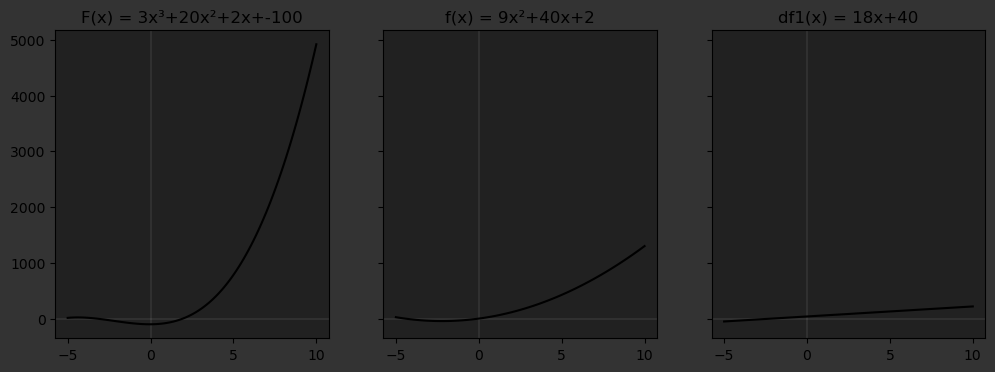

In [31]:
polypow3([3,20,2,-100])

In [32]:
x = sp.symbols('x')
expr = x**2 + 2*x + 1


f = sp.lambdify(x, expr, 'numpy')

x_vals = np.array([0, 1, 2, 3])
y_vals = f(x_vals)
expr

x**2 + 2*x + 1

In [33]:
def create_polynomial(coeffs):
    x = sp.symbols('x')
    n = len(coeffs) - 1
    poly_expr = 0
    for i in range(n+1):
        poly_expr += coeffs[i]*x**i
    return poly_expr

L = [1,2,3,5,6]
create_polynomial(L)

6*x**4 + 5*x**3 + 3*x**2 + 2*x + 1